In [99]:
import pandas as pd
# import sweetviz as sv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [57]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# 1. Description
The data we have is from two sources (see first two scripts):
* WESAD
* Nurse Study

We combine these two datasets into one. The contain the same information (x, y, z values from the same wrist sensor) and the same labels (stress/no stress). The accelerometer data is recorded with 32 Hz. In the following, we look at the raw dataset, as well as the features created with the FLIRT (https://flirt.readthedocs.io/en/latest/) library (see other script).

Note: there might be other potential features to be calculated on the raw data, for example via tsfresh (https://tsfresh.readthedocs.io/en/latest/index.html) or TSFEL (https://tsfel.readthedocs.io/en/latest/). However, FLIRT was specifically developed with the wrist sensor used in the two dataset used here, so we can reasonably expect it to produce meaningful features based on the accelerometer data.

# 2. Data Source

## 2.1 Raw data source

In [3]:
# load data
df_wesad = pd.read_parquet('data-input/dataset_wesad.parquet')
df_nurses = pd.read_parquet('data-input/dataset_nurses.parquet')

In [4]:
df_raw = pd.concat([df_wesad, df_nurses])

In [5]:
df_raw

,x,y,z,subject,label
0,23.0,-1.0,59.0,S10,0
1,24.0,0.0,59.0,S10,0
2,25.0,0.0,58.0,S10,0
3,23.0,-1.0,57.0,S10,0
4,24.0,0.0,59.0,S10,0
...,...,...,...,...,...
8543804,-28.0,-58.0,10.0,F5,1
8543805,-15.0,-60.0,21.0,F5,1
8543806,-10.0,-42.0,33.0,F5,1
8543807,-13.0,-31.0,35.0,F5,1


In [6]:
# there are no missing values in the dataset
df_raw.isnull().sum()

x          0
y          0
z          0
subject    0
label      0
dtype: int64

In [7]:
df_raw['subject'].value_counts()

83     1372819
E4     1127162
DF      835993
7A      821472
CE      613793
BG      608655
EG      549124
6B      516369
6D      482968
5C      460948
F5      385411
94      267022
7E      221270
8B      187973
15       92830
S10      60963
S17      60929
S15      59554
S11      59519
S14      59361
S16      59295
S13      59008
S5       58975
S8       58847
S6       58561
S7       58431
S9       58399
S4       57379
S3       56961
S2       56288
Name: subject, dtype: int64

In [8]:
df_raw['label'].value_counts(normalize=True)

1    0.79448
0    0.20552
Name: label, dtype: float64

## 2.2 Features dataset

In [16]:
# load data - features calculated with Flirt with
# window_length = 60 and
# window_step_size = 1
df = pd.read_parquet('data-input/flirt-60-1.parquet')

In [17]:
df

,x_mean,x_std,x_min,x_max,x_ptp,x_sum,x_energy,x_skewness,x_kurtosis,x_peaks,...,l2_n_sign_changes,l2_iqr,l2_iqr_5_95,l2_pct_5,l2_pct_95,l2_entropy,l2_perm_entropy,l2_svd_entropy,subject,label
0,-39.333854,21.911315,-119.0,41.0,160.0,-75521.0,3892335.0,0.667670,1.122428,480,...,0,6.716873,38.096548,49.909418,88.005966,7.546237,0.999670,0.456264,15,0
1,-39.522917,21.929207,-119.0,41.0,160.0,-75884.0,3922466.0,0.690015,1.133307,485,...,0,6.711957,38.096548,49.909418,88.005966,7.546232,0.999489,0.456358,15,0
2,-39.884375,21.849108,-119.0,41.0,160.0,-76578.0,3970842.0,0.734060,1.226828,490,...,0,6.757474,37.567903,50.438062,88.005966,7.546386,0.999269,0.455761,15,0
3,-40.117188,21.847705,-119.0,41.0,160.0,-77025.0,4006485.0,0.754623,1.275292,490,...,0,6.441981,36.429907,50.546513,86.976421,7.546820,0.999406,0.455364,15,0
4,-40.265625,21.854092,-119.0,41.0,160.0,-77310.0,4029930.0,0.772855,1.290254,494,...,0,6.300316,35.156783,50.943094,86.099877,7.547107,0.999406,0.452354,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,59.100629,0.877353,56.0,64.0,8.0,9397.0,555491.0,1.088573,8.819387,17,...,0,0.261592,1.994493,61.926548,63.921042,5.068814,0.904938,0.083176,S9,1
641,59.125984,0.980054,56.0,64.0,8.0,7509.0,444099.0,0.900382,6.406320,17,...,0,0.535871,2.331194,61.762448,64.093642,4.844074,0.957356,0.091233,S9,1
642,59.200000,1.110713,56.0,64.0,8.0,5624.0,333058.0,0.660031,4.386405,15,...,0,0.946680,2.588040,61.552431,64.140471,4.553731,0.978071,0.101184,S9,1
643,59.444444,1.192274,56.0,64.0,8.0,3745.0,222709.0,0.496950,4.219449,10,...,0,0.956527,2.421021,61.943523,64.364543,4.142958,0.979869,0.109214,S9,1


In [10]:
# there are no missing values in the dataset
df.isnull().sum()

x          0
y          0
z          0
subject    0
label      0
dtype: int64

In [11]:
df['subject'].value_counts()

83     1372819
E4     1127162
DF      835993
7A      821472
CE      613793
BG      608655
EG      549124
6B      516369
6D      482968
5C      460948
F5      385411
94      267022
7E      221270
8B      187973
15       92830
S10      60963
S17      60929
S15      59554
S11      59519
S14      59361
S16      59295
S13      59008
S5       58975
S8       58847
S6       58561
S7       58431
S9       58399
S4       57379
S3       56961
S2       56288
Name: subject, dtype: int64

In [12]:
df['label'].value_counts(normalize=True)

1    0.79448
0    0.20552
Name: label, dtype: float64

# 3. Train-test split
We perform the train-test split before we conduct EDA on the train set. Thus, we avoid data leakage from the test set.

In [18]:
X = df.drop(columns=['subject', 'label'])
y = df[['label']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
df_train= pd.concat([X_train, y_train], axis=1)

# 4. EDA

## 4.1 Looking into data

In [89]:
# we do not have categorical features, only int (count) and float
df_train.dtypes.tolist()

[dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('i

In [90]:
# looking into the data at each column

In [59]:
df_train.describe().iloc[:,0:14]

,x_mean,x_std,x_min,x_max,x_ptp,x_sum,x_energy,x_skewness,x_kurtosis,x_peaks,x_rms,x_lineintegral,x_n_above_mean,x_n_below_mean
count,235572.000000,235572.000000,235572.000000,235572.000000,235572.000000,235572.000000,2.355720e+05,235572.000000,235572.000000,235572.000000,235572.000000,235572.000000,235572.000000,235572.000000
mean,-23.841267,14.001163,-81.125537,37.962653,119.088190,-45526.357088,3.504182e+06,0.220692,7.548435,336.692073,40.940538,5389.264335,922.879379,981.366105
std,31.624229,8.800774,43.508947,48.297190,65.860961,60299.471477,1.923298e+06,1.707047,22.958003,85.192971,12.878377,4714.450708,313.957732,314.355577
min,-65.376042,0.022816,-128.000000,-65.000000,1.000000,-125522.000000,3.150000e+02,-33.718122,-1.999722,0.000000,0.888585,2.000000,1.000000,1.000000
25%,-44.980729,6.701820,-121.000000,3.000000,69.000000,-85989.250000,1.962725e+06,-0.546825,0.295594,288.000000,32.266608,1903.000000,733.000000,785.000000
50%,-33.348958,13.736699,-88.000000,33.000000,120.000000,-63500.000000,3.447278e+06,0.198405,2.260064,344.000000,42.569092,3891.000000,923.000000,989.000000
75%,-17.268620,20.360718,-56.000000,73.000000,166.000000,-32117.500000,4.883691e+06,0.935484,6.895698,396.000000,50.611014,7523.000000,1123.000000,1175.000000
max,62.607292,54.830518,61.000000,127.000000,255.000000,120206.000000,8.206638e+06,43.783565,1915.000521,639.000000,65.378059,36979.000000,1917.000000,1919.000000


In [63]:
df_train.describe().iloc[:,14:28]

,x_n_sign_changes,x_iqr,x_iqr_5_95,x_pct_5,x_pct_95,x_entropy,x_perm_entropy,x_svd_entropy,y_mean,y_std,y_min,y_max,y_ptp,y_sum
count,235572.000000,235572.000000,235572.000000,235572.000000,235572.00000,2.355720e+05,235572.000000,235572.000000,235572.000000,235572.000000,235572.000000,235572.000000,235572.000000,235572.000000
mean,30.205245,16.442717,41.080462,-43.397112,-2.31665,-inf,0.880451,0.428374,-1.375705,16.279999,-55.009517,48.693219,103.702736,-2623.459923
std,46.692317,15.167441,27.460548,32.671369,33.60825,NaN,0.137263,0.205698,24.573300,12.512200,45.770113,35.963924,66.380702,46811.485586
min,0.000000,0.000000,0.000000,-101.050000,-65.00000,-inf,-0.000000,0.004137,-79.100000,0.022816,-128.000000,-66.000000,1.000000,-128484.000000
25%,0.000000,3.250000,17.050000,-65.000000,-25.00000,NaN,0.828770,0.270562,-15.550651,4.739595,-92.000000,24.000000,47.000000,-29404.000000
50%,10.000000,12.000000,40.000000,-58.000000,-9.00000,NaN,0.926910,0.424625,0.460417,14.409099,-51.000000,51.000000,98.000000,862.000000
75%,41.000000,26.000000,61.000000,-30.000000,14.00000,7.531008e+00,0.980274,0.590779,11.852083,25.840467,-18.000000,71.000000,159.000000,22448.000000
max,678.000000,115.000000,149.000000,62.000000,87.00000,7.560080e+00,1.000000,0.995055,65.500000,64.976257,62.000000,127.000000,255.000000,124442.000000


In [68]:
df_train.describe().iloc[:,29:43]

,y_skewness,y_kurtosis,y_peaks,y_rms,y_lineintegral,y_n_above_mean,y_n_below_mean,y_n_sign_changes,y_iqr,y_iqr_5_95,y_pct_5,y_pct_95,y_entropy,y_perm_entropy
count,235572.000000,235572.000000,235572.000000,235572.000000,235572.000000,235572.000000,235572.000000,235572.000000,235572.000000,235572.000000,235572.000000,235572.000000,2.355720e+05,235572.000000
mean,0.188765,7.426866,248.208862,27.356944,3190.268270,916.628657,987.607967,62.847516,20.312395,47.816557,-24.680328,23.136229,-inf,0.813518
std,2.021325,29.389364,74.852425,16.701161,3145.519769,361.142822,363.273208,83.781614,22.590528,38.335760,31.982974,27.639216,NaN,0.175321
min,-43.783565,-1.999996,0.000000,0.032275,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-124.000000,-66.900000,-inf,-0.000000
25%,-0.684993,-0.421630,204.000000,13.130158,949.000000,675.000000,753.000000,6.000000,2.000000,11.000000,-54.000000,5.000000,NaN,0.716258
50%,0.085397,1.264433,251.000000,25.821356,2012.000000,924.000000,985.000000,34.000000,10.000000,43.000000,-20.000000,21.000000,NaN,0.857744
75%,1.000088,6.315888,295.000000,40.693105,4390.000000,1153.000000,1230.000000,87.000000,35.000000,77.000000,0.000000,46.000000,NaN,0.959336
max,43.783565,1915.000521,637.000000,79.861756,21159.000000,1919.000000,1919.000000,748.000000,138.250000,186.000000,64.000000,97.000000,7.560080e+00,1.000000


In [74]:
df_train.describe().iloc[:,43:57]

,y_svd_entropy,z_mean,z_std,z_min,z_max,z_ptp,z_sum,z_energy,z_skewness,z_kurtosis,z_peaks,z_rms,z_lineintegral,z_n_above_mean
count,235572.000000,235572.000000,235572.000000,235572.000000,235572.000000,235572.000000,235572.000000,2.355720e+05,235572.000000,235572.000000,235572.000000,235572.000000,235572.000000,235572.000000
mean,0.478613,22.369022,16.933332,-41.235104,80.276625,121.511729,42716.027219,2.658186e+06,-0.426770,7.163924,295.889469,34.679014,4432.471542,1026.594336
std,0.216701,22.401488,10.214202,45.092594,33.915878,66.762511,42867.876281,1.884106e+06,1.853970,25.282529,76.074725,13.806944,4005.908051,324.018175
min,0.005499,-61.600000,0.039498,-128.000000,-61.000000,1.000000,-118272.000000,1.200000e+01,-26.324660,-2.000000,0.000000,0.530330,2.000000,1.000000
25%,0.312752,8.544792,8.095194,-70.000000,62.000000,73.000000,15959.500000,1.166098e+06,-1.136067,-0.250913,251.000000,24.836331,1556.000000,837.000000
50%,0.491524,21.868750,17.518344,-42.000000,81.000000,121.000000,41561.500000,2.239236e+06,-0.317613,1.257694,301.000000,34.282470,3169.000000,1024.000000
75%,0.635143,39.213151,24.641469,-12.000000,104.000000,170.000000,74988.000000,3.822625e+06,0.344063,5.318925,346.000000,44.756754,6082.000000,1230.000000
max,1.000000,64.040104,58.454547,62.000000,127.000000,255.000000,122957.000000,7.874425e+06,27.304831,1022.425655,606.000000,64.041104,31572.000000,1917.000000


In [78]:
df_train.describe().iloc[:,57:71]

,z_n_below_mean,z_n_sign_changes,z_iqr,z_iqr_5_95,z_pct_5,z_pct_95,z_entropy,z_perm_entropy,z_svd_entropy,l2_mean,l2_std,l2_min,l2_max,l2_ptp
count,235572.000000,235572.000000,235572.000000,235572.000000,235572.000000,235572.000000,2.355720e+05,235572.000000,235572.000000,235572.000000,235572.000000,235572.000000,235572.000000,235572.000000
mean,877.716337,51.729845,20.801619,50.140970,-5.175525,44.965445,-inf,0.860394,0.464092,64.805175,5.978710,34.819022,122.017717,87.198695
std,321.020802,62.580227,18.806946,31.857041,30.709413,20.487793,NaN,0.146919,0.232762,1.791103,4.889864,15.498740,39.701823,53.113797
min,1.000000,0.000000,0.000000,0.000000,-94.900000,-61.000000,-inf,0.016841,0.006007,61.524198,0.030157,1.000000,62.177166,0.787972
25%,677.000000,4.000000,4.000000,21.000000,-28.000000,38.000000,NaN,0.791483,0.280637,63.859186,2.195514,22.494444,89.269256,44.547387
50%,887.000000,28.000000,16.000000,52.050000,-8.000000,52.000000,NaN,0.908064,0.456535,64.514017,4.572401,34.713110,117.383985,84.647410
75%,1069.000000,78.000000,34.000000,75.000000,12.000000,59.000000,NaN,0.974836,0.648851,65.258013,8.719992,46.765372,148.825401,126.163652
max,1917.000000,612.000000,119.000000,194.500000,64.000000,104.800000,7.560080e+00,1.000000,0.999996,95.080834,33.195945,75.133215,221.702503,220.126661


In [86]:
df_train.describe().iloc[:,71:85]

,l2_sum,l2_energy,l2_skewness,l2_kurtosis,l2_peaks,l2_rms,l2_lineintegral,l2_n_above_mean,l2_n_below_mean,l2_n_sign_changes,l2_iqr,l2_iqr_5_95,l2_pct_5,l2_pct_95
count,235572.000000,2.355720e+05,235572.000000,235572.000000,235572.000000,235572.000000,235572.000000,235572.000000,235572.000000,235572.0,235572.000000,235572.000000,235572.000000,235572.000000
mean,123415.662669,8.117470e+06,2.425030,41.456968,274.938244,65.246368,4654.173433,768.808305,1135.625690,0.0,3.257838,15.821835,57.900004,73.721839
std,9663.252889,8.519291e+05,2.716956,68.712177,88.517808,2.342202,4178.577726,210.205107,220.937508,0.0,4.422006,16.117642,5.440654,11.038279
min,716.698946,4.669900e+04,-27.086516,-1.926827,0.000000,61.595433,0.830983,3.000000,1.000000,0.0,0.000000,0.000000,31.755288,61.854668
25%,122540.872663,7.850022e+06,0.930935,8.689618,216.000000,63.977910,1548.700943,640.000000,1023.000000,0.0,0.747372,3.313848,54.446759,65.833122
50%,123830.746423,8.033653e+06,1.801222,21.022008,279.000000,64.703724,3220.705279,769.000000,1145.000000,0.0,1.329188,9.398748,59.836440,69.294477
75%,125258.234559,8.289970e+06,3.233124,47.222081,336.000000,65.731189,6525.349834,889.250000,1272.000000,0.0,3.681360,24.160618,62.208922,78.448391
max,165391.106198,1.517830e+07,39.490140,1654.915773,575.000000,96.161843,29946.039132,1845.000000,1896.000000,0.0,42.868923,100.851930,76.217860,147.319040


In [87]:
df_train.describe().iloc[:,85:]

,l2_entropy,l2_perm_entropy,l2_svd_entropy,label
count,235572.000000,235572.000000,235572.000000,235572.000000
mean,7.538206,0.960833,0.276003,0.794844
std,0.165921,0.066051,0.151808,0.403816
min,2.291144,0.021636,0.003124,0.000000
25%,7.550996,0.951751,0.153728,1.000000
50%,7.557537,0.986792,0.263403,1.000000
75%,7.559473,0.998374,0.394196,1.000000
max,7.560080,1.000000,0.764682,1.000000


In [91]:
df_train['z_entropy']

13874    7.560001
600          -inf
12791    7.553014
24527        -inf
14727        -inf
           ...   
4313         -inf
92           -inf
1579     7.556348
1            -inf
2952         -inf
Name: z_entropy, Length: 235572, dtype: float64

## 4.2 Correlations

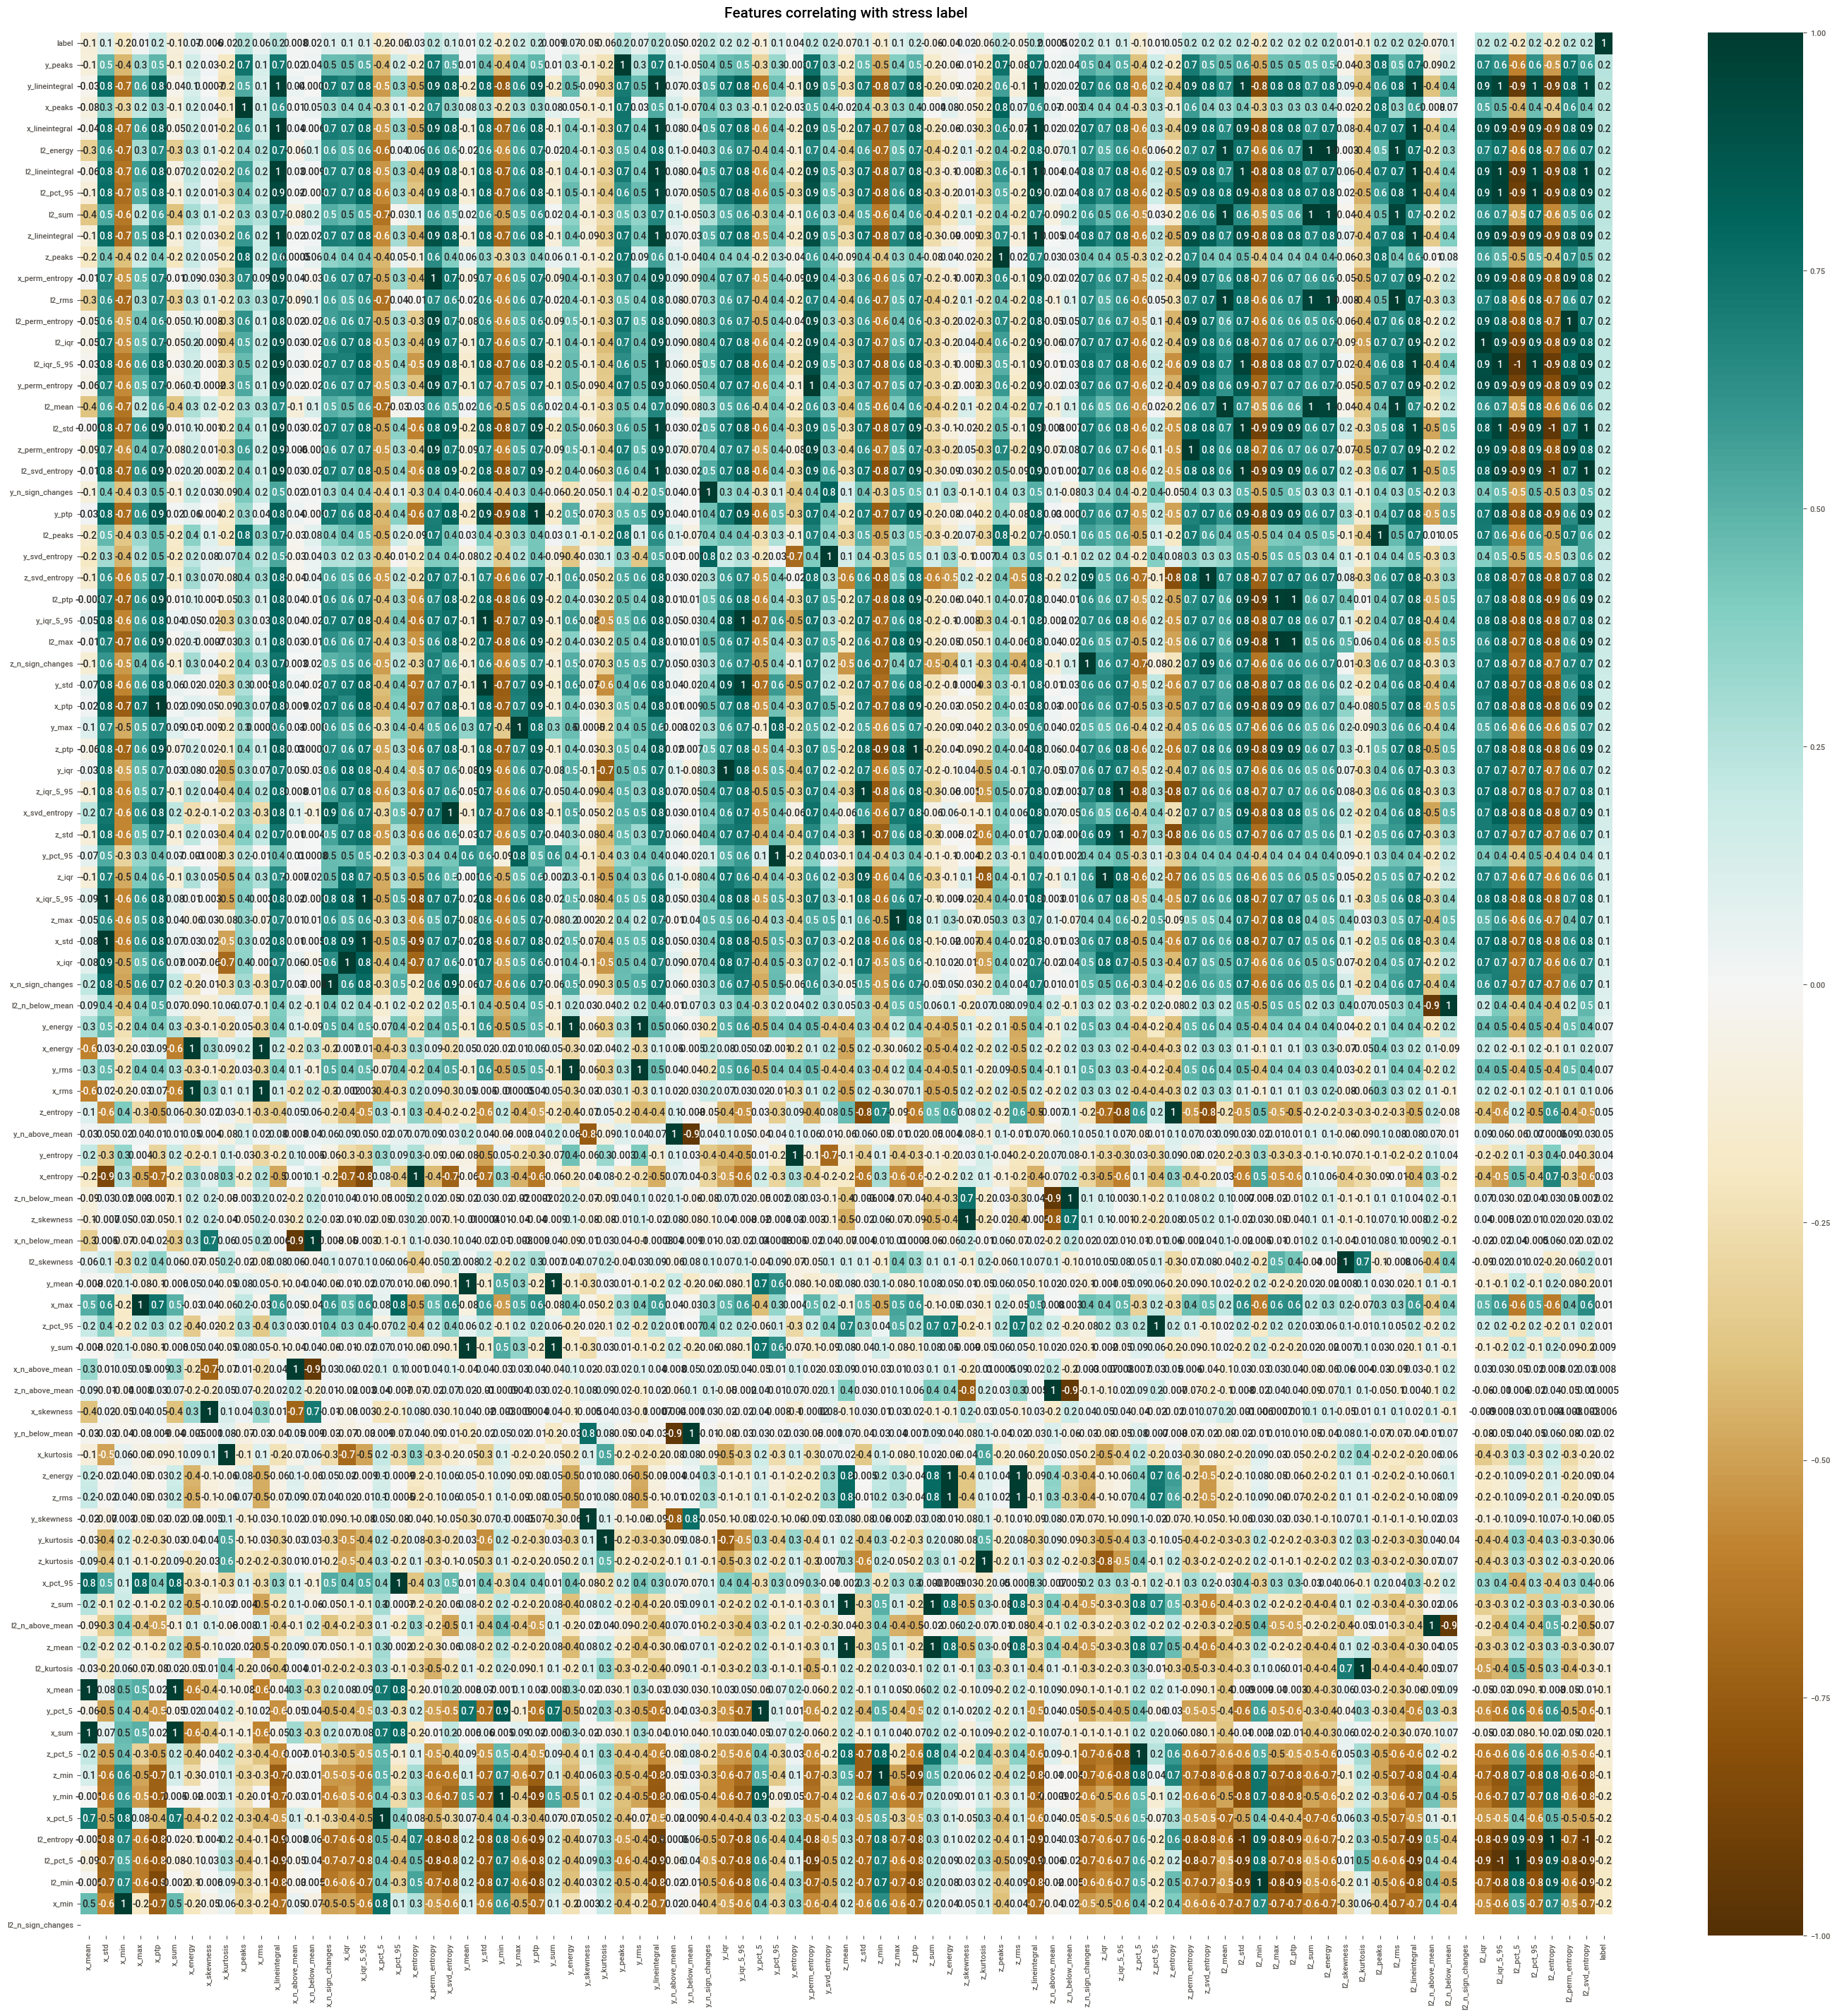

In [100]:
plt.figure(figsize=(35, 35))
corr = df_train.corr(method='spearman')
heatmap = sns.heatmap(corr.sort_values(by='label', ascending=False),
                      vmin=-1, vmax=1, annot=True, fmt='.1g', cmap='BrBG')
heatmap.set_title('Features correlating with stress label', fontdict={'fontsize':15}, pad=16);

# 5. Documenting data lineage

The data we have is from two sources:
* WESAD
* Nurse Study

We combine these two datasets into one. They contain the same information (x, y, z values from the same wrist sensor) and the same labels (stress/no stress). The accelerometer data is recorded with 32 Hz.

Script ```01-extract-data-from-WESAD``` downloads the WESAD dataset, and extracts the accelerometer data from the Empatica E4 wrist sensor, and adds the ground-truth label stress/no stress. The resulting file is stores as a parquet file.

Script ```01-extract-data-from-nurse-dataset``` downloads the nurse study dataset. It unzips all included files. From the raw data from the Empatica E4 wrist sensor, we use the devicely library (https://hpi-dhc.github.io/devicely/) for extracing the accelerometer data and setting it in the correct timezone given in the publication about the data (https://www.nature.com/articles/s41597-022-01361-y). We look up the ground-truth labels and use the stress/no stress labels to label the accelerometer data. The results are stored as a parquet file.

In script ```02-calculate-features```, we concatenate both datasets and calculate features with the FLIRT library (https://flirt.readthedocs.io/en/latest/). In this notebook you're currently reading, we perform EDA. In the following steps, we might want to go back to feature calculation and calculate other/more features. The raw dataset consisting of the raw 32 Hz x, y, and z values though, is fixed and serves as the input for feature calculation.

# 6. Observations from EDA

### Raw data
* There are no missing values.
* We have 9426279 rows of raw data.
* We have 80% of positive cases (stress) and 20% of negative cases in our data - we have to account for this when building and evaluating the model, e.g., by using appropriate evaluation metrics for imbalanced data.
* We could also calculate feature via tsfresh and/or TSFEL; and we could try different parameters for window_length and window_step_size when using FLIRT.

### Looking into the tables and .describe() of all features
* We do not have categorical variables, only numerical (count and float).
* l2_n_sign_changes is constant (the same for every row) and should be removed.
* For x_entropy, y_entropy, and z_entropy, we cannot calculate mean, standard deviation, etc., because several values are calculated as minus infinity. We should decide later on, how we can best deal with this.
* The ranges of the values are quite far from each other - we should normalize/standardize.

### Correlations
* There are several correlated features. Because of the amount of features, we should apply an automated method for deciding which features to keep.